<B>Forward Current vs Junction Voltage</B>

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
#Function for which we want to fit the curve
def func(x,m,c):
    return m*x + c

In [4]:
forward = pd.DataFrame()

In [5]:
forward["Forward_Curent_I_(uA)"]= [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500,  3000,  4000, 5000, 6000, 7000, 8000, 9000, 10000, 12000, 14000]
forward["log(I)"] = np.log(forward["Forward_Curent_I_(uA)"])
forward["Junction_Voltage_(Volts)"] = [0.633, 0.661, 0.676, 0.688, 0.695, 0.702, 0.707, 0.712, 0.716, 0.719, 0.733, 0.743, 0.750, 0.757, 0.766, 0.774, 0.779, 0.785, 0.789, 0.793, 0.797, 0.804, 0.809]

In [6]:
forward

,Forward_Curent_I_(uA),log(I),Junction_Voltage_(Volts)
0,100,4.605170,0.633
1,200,5.298317,0.661
2,300,5.703782,0.676
3,400,5.991465,0.688
4,500,6.214608,0.695
5,600,6.396930,0.702
6,700,6.551080,0.707
7,800,6.684612,0.712
8,900,6.802395,0.716
9,1000,6.907755,0.719


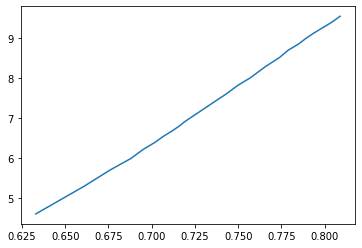

In [7]:
plt.plot(forward["Junction_Voltage_(Volts)"], forward["log(I)"])

array([ 28.81328927, -13.78143881])

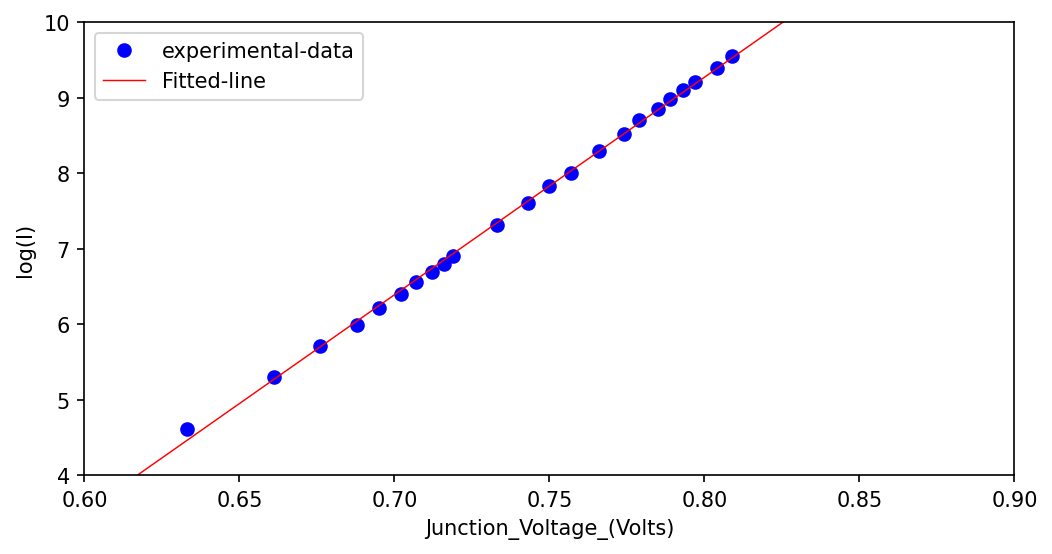

In [8]:
#fitting the curve by providing function, xdata,ydata and boundaries and it will return the fitted constants of the given function in popt
popt, pcov = curve_fit(func,forward["Junction_Voltage_(Volts)"],forward["log(I)"])
#popt contains the list of the constants 
funcdata = func(np.linspace(0,0.900,30),popt[0],popt[1])   #functdata contains the fitted ydata , here we can provide any xdata as we are now generating ydata on the fitted curve function
plt.figure(figsize=(8,4),dpi=150)
#Ploting the x data(our original data) and y(our original data)
plt.plot(forward["Junction_Voltage_(Volts)"],forward["log(I)"], 'bo',label='experimental-data',lw=2)
#Ploting the fitted curve for and random x
plt.plot(np.linspace(0,0.900,30),funcdata,'r',label="Fitted-line",lw=0.7);
plt.xlim(0.6,0.900)
plt.ylim(4,10)
plt.legend()
plt.ylabel("log(I)")
plt.xlabel("Junction_Voltage_(Volts)")
popt

<B>Temperature vs Junction Voltage</B>

In [9]:
temp_junct = pd.DataFrame()

In [10]:
temp_junct["Temperature(K)"] = [310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375]
temp_junct["Junction_Voltage(V)"]  = [0.708, 0.700, 0.690, 0.675, 0.673, 0.662, 0.652, 0.649, 0.640, 0.629, 0.618, 0.609, 0.600, 0.592]

In [11]:
temp_junct

,Temperature(K),Junction_Voltage(V)
0,310,0.708
1,315,0.700
2,320,0.690
3,325,0.675
4,330,0.673
5,335,0.662
6,340,0.652
7,345,0.649
8,350,0.640
9,355,0.629


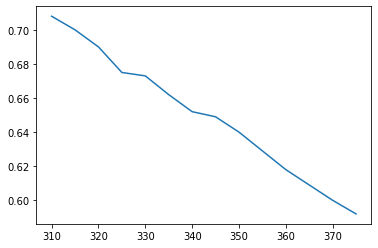

In [12]:
plt.plot(temp_junct["Temperature(K)"], temp_junct["Junction_Voltage(V)"])

array([-0.00176923,  1.25574725])

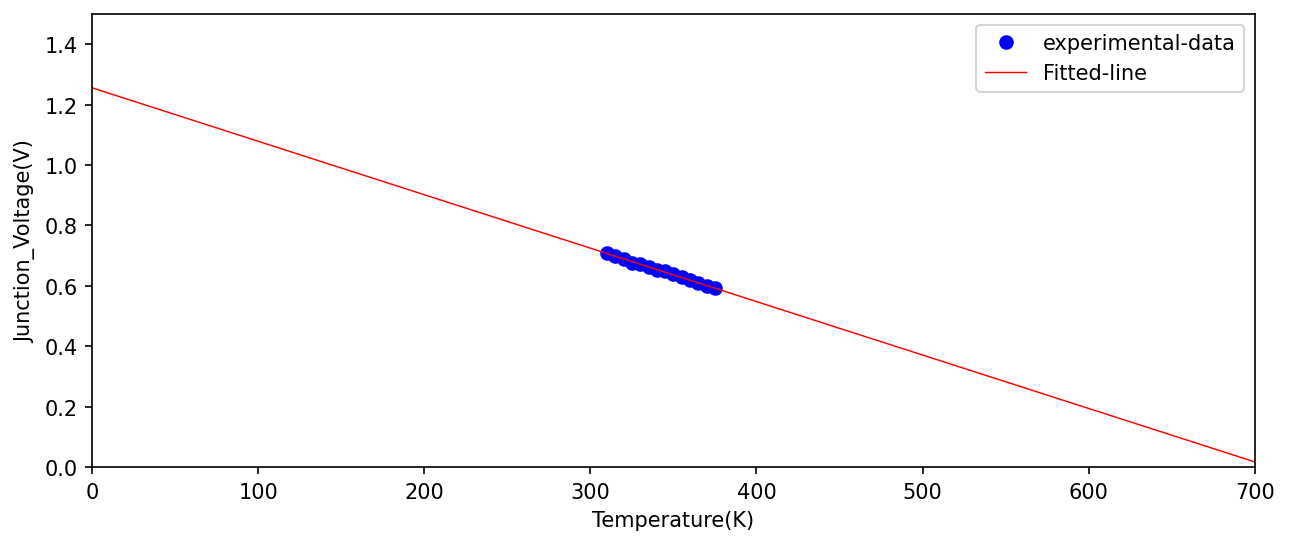

In [13]:
#fitting the curve by providing function, xdata,ydata and boundaries and it will return the fitted constants of the given function in popt
popt, pcov = curve_fit(func,temp_junct["Temperature(K)"],temp_junct["Junction_Voltage(V)"])
#popt contains the list of the constants 
funcdata = func(np.linspace(0,730,55),popt[0],popt[1])   #functdata contains the fitted ydata , here we can provide any xdata as we are now generating ydata on the fitted curve function
plt.figure(figsize=(10,4),dpi=150)
#Ploting the x data(our original data) and y(our original data)
plt.plot(temp_junct["Temperature(K)"],temp_junct["Junction_Voltage(V)"], 'bo',label='experimental-data',lw=2)
#Ploting the fitted curve for and random x
plt.plot(np.linspace(0,730,55),funcdata,'r',label="Fitted-line",lw=0.7);
plt.xlim(0,700)
plt.ylim(0,1.5)
plt.legend()
plt.ylabel("Junction_Voltage(V)")
plt.xlabel("Temperature(K)")
popt

<B>Bias Voltage_Capacitance</B>

In [14]:
capacitance = pd.DataFrame()

In [15]:
capacitance["Bias_Voltage(V)"] = [0, -0.5, -1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0,  -8.0, -10]
capacitance["V2(mV)"] = [350, 280, 248.75, 222.50, 207.50, 193.75, 187.50, 182.50, 178.75, 173.75, 170.00 ]  #20KHz
capacitance["V1(mV)"] = [97.75, 73.50, 65.50, 59.25, 54.50, 51.50, 49.25, 47.75, 46.75, 45.75,  44.50]   #5KHz
capacitance["C(pf"] = 0.41*np.sqrt((capacitance["V2(mV)"])**2 - (capacitance["V1(mV)"])**2)

In [16]:
capacitance

,Bias_Voltage(V),V2(mV),V1(mV),C(pf
0,0.0,350.00,97.75,137.789854
1,-0.5,280.00,73.50,110.774193
2,-1.0,248.75,65.50,98.388308
3,-2.0,222.50,59.25,87.931081
4,-3.0,207.50,54.50,82.088103
5,-4.0,193.75,51.50,76.579848
6,-5.0,187.50,49.25,74.175660
7,-6.0,182.50,47.75,72.218433
8,-7.0,178.75,46.75,70.736586
9,-8.0,173.75,45.75,68.723632


Text(0.5, 0, 'Bias_Voltage(V)')

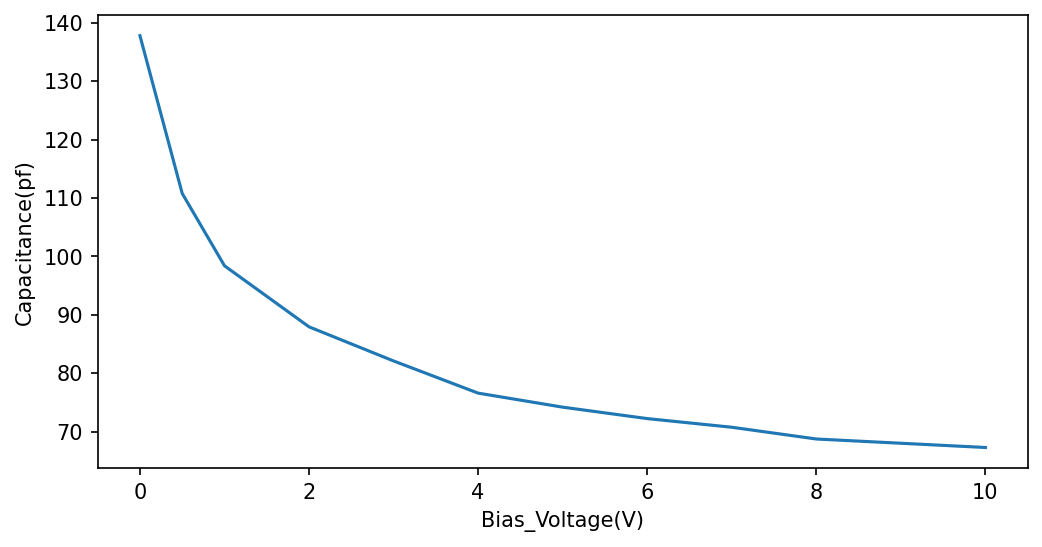

In [17]:
plt.figure(figsize=(8,4),dpi=150)
plt.plot(-1*capacitance["Bias_Voltage(V)"], capacitance["C(pf"])
plt.ylabel("Capacitance(pf)")
plt.xlabel("Bias_Voltage(V)")